In [32]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import warnings
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
%matplotlib inline

warnings.simplefilter('ignore')

In [33]:
antenna_poplulation = 1
tag_population = 3
actual_x = 0.1
y_distance = 2
sample_count = 10
frequency_mhz = 920.4
frequency = frequency_mhz * (10 ** 6)
antenna_space = 0.03
transmission_power = 30.0
light_speed = 2.998e8
wave_length = light_speed / frequency
theta_range = np.arange(-60,60.001, 0.001)

In [34]:
TARGET_TAGS = {
    "E200 4216 02D0 6410 02BC E121" : 1,
    "E200 4216 0400 6410 02BC E134" : 2,
    "E200 4216 04F0 6410 02BC E143" : 3,
}
TARGET_ANTENNA = 1

In [35]:
from classes.music import MUSIC
music = MUSIC(antenna_poplulation=tag_population, tag_population=antenna_poplulation, frequency=frequency, sampling_count=sample_count, antenna_space=antenna_space, theta_range=theta_range)

In [36]:
data_map = {}
for x in range(0, 110, 10):
    data_file = f"data/music_{x}_rfmode3.csv"
    df = pd.read_csv(data_file)
    df = df[df["frequency"] == frequency_mhz]
    df["tagNumber"] = df["tagId"].map(TARGET_TAGS)
    df = df[df["samplingNumber"] < sample_count]
    df = df[df["antennaNumber"] == TARGET_ANTENNA]
    df = df[["tagNumber", "phase", "rssi", "samplingNumber", "frequency"]]
    data_list = []
    for tag in range(1, tag_population+1):
        df_tag = df[df["tagNumber"] == tag]
        if data_file == "data/music_10_rfmode3.csv":
            if tag == 3:
                df_tag["phase"] = df_tag["phase"] + 0.06
        if data_file == "data/music_20_rfmode3.csv":
            if tag == 3:
                df_tag["phase"] = df_tag["phase"] - 0.03
        if data_file == "data/music_30_rfmode3.csv":
            if tag==3:
                df_tag["phase"] = df_tag["phase"] - 1.9
        if data_file == "data/music_40_rfmode3.csv":
            if tag==2:
                df_tag["phase"] = df_tag["phase"] + 0.1
        if data_file == "data/music_50_rfmode3.csv":
            if tag==3:
                df_tag["phase"] = df_tag["phase"] - 0.49
            if tag==2:
                df_tag["phase"] = df_tag["phase"] - 0.3
        if data_file == "data/music_60_rfmode3.csv":
            if tag==3:
                df_tag["phase"] = df_tag["phase"] + 0.31
        if data_file == "data/music_70_rfmode3.csv":
            if tag==2:
                df_tag["phase"] = df_tag["phase"] - 0.05
        if data_file == "data/music_80_rfmode3.csv":
            if tag==3:
                df_tag["phase"] = df_tag["phase"] - 0.1
        if data_file == "data/music_90_rfmode3.csv":
            if tag==2:
                df_tag["phase"] = df_tag["phase"] - 0.09
        if data_file == "data/music_100_rfmode3.csv":
            if tag ==3:
                df_tag["phase"] = df_tag["phase"] + 0.3
        data_list.append([df_tag["phase"][:sample_count].tolist()])
    data_list = np.array(data_list).T
    data_map[x] = data_list

In [37]:
cdf = np.empty(400)
error_list = []
for x in range(0, 110, 10):
    data_list = data_map[x]
    actual_angle = -np.arctan(x/100 / y_distance) * 180 / np.pi
    error = music.get_error_list(data_list, actual_angle)
    error_list.append(error)
    cdf = cdf + music.get_cdf(error)
cdf = cdf / 11

estimated angle: 3.6589999998516376, error: 3.6589999998516376
estimated angle: 1.6599999998562966, error: 1.6599999998562966
estimated angle: 3.037999999853085, error: 3.037999999853085
estimated angle: 2.6919999998538913, error: 2.6919999998538913
estimated angle: 1.9919999998555227, error: 1.9919999998555227
estimated angle: 5.969999999846252, error: 5.969999999846252
estimated angle: 1.0119999998578066, error: 1.0119999998578066
estimated angle: 2.042999999855404, error: 2.042999999855404
estimated angle: 3.6409999998516795, error: 3.6409999998516795
estimated angle: 2.2619999998548934, error: 2.2619999998548934
estimated angle: -5.5940000001267975, error: 2.73159477401505
estimated angle: -6.027000000125788, error: 3.164594774014041
estimated angle: -5.847000000126208, error: 2.9845947740144605
estimated angle: -6.27500000012521, error: 3.412594774013463
estimated angle: -5.161000000127807, error: 2.2985947740160593
estimated angle: -5.8360000001262335, error: 2.973594774014486
es

Text(0, 0.5, 'CDF')

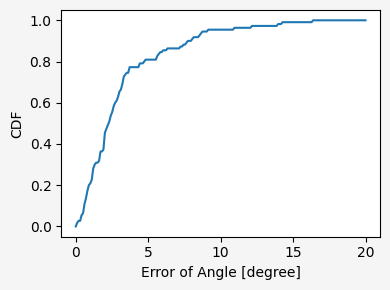

In [38]:
fig, ax = plt.subplots(tight_layout=True, facecolor="whitesmoke")
fig.set_size_inches(w=4, h=3)
ax.plot(np.linspace(0, 20, 200), cdf[0: 200])
ax.set_xlabel("Error of Angle [degree]")
ax.set_ylabel("CDF")


Text(0.5, 0, 'Tag Array Location in x-axis [cm]')

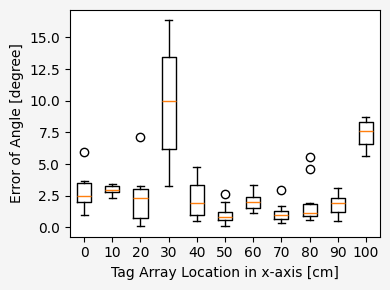

In [39]:
fig, ax = plt.subplots(tight_layout=True, facecolor="whitesmoke")
fig.set_size_inches(w=4, h=3)
ax.boxplot(error_list, labels=[str(x) for x in range(0,110,10)])
ax.set_ylabel("Error of Angle [degree]")
ax.set_xlabel("Tag Array Location in x-axis [cm]")

In [42]:
print(np.array(error_list).mean())

3.2280500540449766


In [47]:
4 * np.pi * antenna_space * np.sin(5 * np.pi / 180) / wave_length

0.10087234302064925